In [2]:
import cv2

In [3]:
cv2.__version__

'4.5.2'

실습 1. 영상 파일 읽기 및 화면 표시

In [10]:
imgFile = 'data/lena.jpg'

img = cv2.imread(imgFile) #cv2.IMREAD_COLOR 이 디폴트
img2 = cv2.imread(imgFile, 0) #cv2.IMREAD_GRAYSCALE

cv2.imshow('Lena Color', img)
cv2.imshow('Lena GrayScale', img2)

cv2.waitKey()
cv2.destroyAllWindows()

실습 2. 영상 파일 저장

In [12]:
imgFile = 'data/lena.jpg'
img = cv2.imread(imgFile) #cv2. IMREAD_COLOR

cv2.imwrite('output/Lena.bmp', img)
cv2.imwrite('output/Lena.png', img)
cv2.imwrite('output/Lena_compression.png', img, [cv2.IMWRITE_PNG_COMPRESSION, 9]) # 0 ~ 9    범위이다.
cv2.imwrite('output/Lena_compression.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 90]) # 0 ~ 100   범위이다.


True

실습 3. matplotlib 컬러영상 표기

In [26]:
import matplotlib.pyplot as plt
import numpy as np

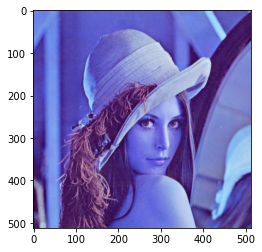

In [20]:
imgFile = 'data/lena.jpg'
img = cv2.imread(imgFile) #cv2. IMREAD_COLOR

plt.imshow(img)# rgb를 거꾸로 bgr로 받아들여서 r의 값이 b에 있어 b가 강조된다.
plt.show()

In [22]:
img.shape

(512, 512, 3)

In [28]:
imgRGB = np.zeros((512, 512, 3), dtype = 'uint8')

In [31]:
imgRGB.shape

(512, 512, 3)

In [23]:
img[:,:,0] #blue

array([[128, 127, 126, ..., 126, 110,  86],
       [127, 127, 127, ..., 130, 112,  83],
       [127, 127, 128, ..., 127, 112,  85],
       ...,
       [ 55,  54,  62, ...,  82,  78,  74],
       [ 55,  56,  66, ...,  82,  80,  81],
       [ 56,  58,  68, ...,  81,  81,  84]], dtype=uint8)

In [24]:
img[:,:,1] #green

array([[138, 137, 136, ..., 145, 129, 104],
       [137, 137, 137, ..., 150, 132, 102],
       [137, 137, 138, ..., 148, 133, 105],
       ...,
       [ 21,  20,  28, ...,  71,  68,  65],
       [ 18,  19,  32, ...,  69,  71,  72],
       [ 19,  21,  34, ...,  68,  72,  74]], dtype=uint8)

In [25]:
img[:,:,2] #red

array([[225, 224, 224, ..., 236, 220, 197],
       [224, 224, 224, ..., 235, 217, 189],
       [224, 224, 225, ..., 230, 215, 190],
       ...,
       [ 82,  81,  92, ..., 175, 175, 175],
       [ 80,  81,  96, ..., 177, 181, 183],
       [ 81,  83,  98, ..., 176, 183, 188]], dtype=uint8)

In [ ]:
imgRGB[:,:, 0] = img[:,:,2]

In [ ]:
imgRGB[:,:, 1] = img[:,:,1]

In [33]:
imgRGB[:,:, 2] = img[:,:,0]

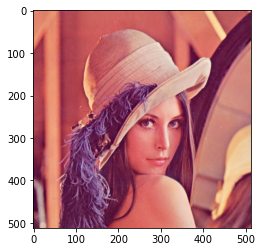

In [37]:
plt.imshow(imgRGB) #위의 것처럼 바꿔주면 rgb로 보인다 근데 이건 plt에서만 쓰이는 거라 cv2로 보면 문제 없다.
plt.show()

In [38]:
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  #해당 코드는 cv2의 내장함수

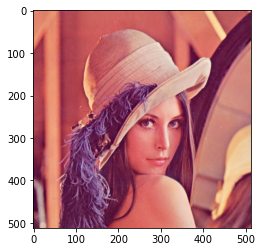

In [39]:
plt.imshow(imgRGB)
plt.show()

실습 4. matplotlib 2: 그레이 스케일 영상 표현하기

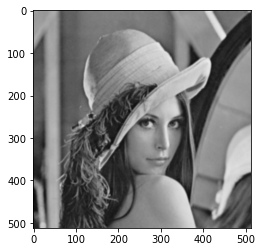

In [45]:
imgFile = 'data/lena.jpg'
imgGray = cv2.imread(imgFile, cv2.IMREAD_GRAYSCALE) #cv2.IMREAD_GRAYSCALE

plt.imshow(imgGray, interpolation='bicubic', cmap='gray')
plt.show()

실습 6. matplotlib 4: 서브플롯에 영상 표시}

In [48]:
imgBGR1 = cv2.imread('./data/lena.jpg')
imgBGR2 = cv2.imread('./data/apple.jpg')
imgBGR3 = cv2.imread('./data/baboon.jpg')
imgBGR4 = cv2.imread('./data/orange.jpg')

In [51]:
imgRGB1 = cv2.cvtColor(imgBGR1, cv2.COLOR_BGR2RGB)
imgRGB2 = cv2.cvtColor(imgBGR2, cv2.COLOR_BGR2RGB)
imgRGB3 = cv2.cvtColor(imgBGR3, cv2.COLOR_BGR2RGB)
imgRGB4 = cv2.cvtColor(imgBGR4, cv2.COLOR_BGR2RGB)

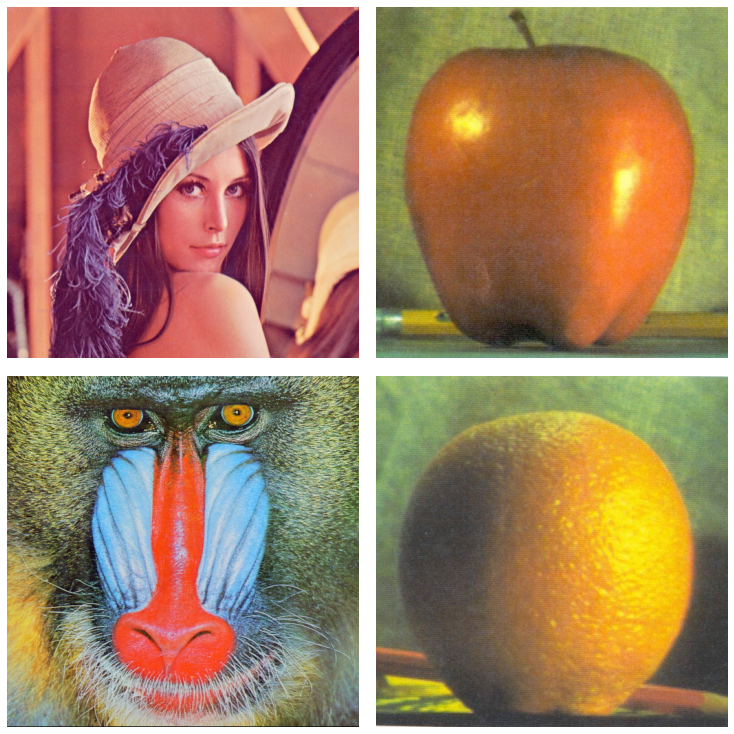

In [65]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10), sharey=True)

ax[0][0].axis('off') #보여주지 않는다. 이미지를 보여줘야하기에 빈 플롯을 보여주지 않는다..
ax[0][0].imshow(imgRGB1, aspect='auto')

ax[0][1].axis('off')
ax[0][1].imshow(imgRGB2, aspect='auto')

ax[1][0].axis('off')
ax[1][0].imshow(imgRGB3, aspect='auto')

ax[1][1].axis('off')
ax[1][1].imshow(imgRGB4, aspect='auto')

plt.subplots_adjust(left=-1, bottom=-1, right=0, top=0, wspace=0.05, hspace=0.05)

plt.savefig('./output/4images.png')
plt.show()

실습 7. 비디오 캡처와 화면 표시 1

In [93]:
cap = cv2.VideoCapture('man_output.mp4')

frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print(frame_size)

while True:
    retval, frame = cap.read() #프레임 캡쳐
    if not retval:
        break
        
    cv2.imshow('frame', frame)
    
    key = cv2.waitKey(25)
    if key == 27: #ESC
        break
if cap.isOpened(): #혹시나 처음부터 오류가 났을때 release를 못하니까.
    cap.release()
    
cv2.destroyAllWindows()

(374, 666)


In [95]:
cap = cv2.VideoCapture('man_output.mp4')

frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print(frame_size)

while True:
    retval, frame = cap.read() # 프레임 캡쳐
    if not retval:
        break
        
    cv2.imshow("frame", frame)
    
    key = cv2.waitKey(25)
    if key == 27: #esc
        break

if cap.isOpened():        
    cap.release()

cv2.destroyAllWindows()


(374, 666)
